Verteilungsschätzung für Spalte Hour1:
Mittelwert: 0.02361813703681962
Standardabweichung: 0.20950624946142926
Geschätzte Verteilung: Normalverteilung mit Mittelwert 0.02361813703681962 und Standardabweichung 0.20950624946142926
Verteilungsschätzung für Spalte Hour2:
Mittelwert: -0.009670830919555635
Standardabweichung: 0.18893065880965518
Geschätzte Verteilung: Normalverteilung mit Mittelwert -0.009670830919555635 und Standardabweichung 0.18893065880965518
Verteilungsschätzung für Spalte Hour3:
Mittelwert: 9.710070807217987e-05
Standardabweichung: 0.17771392060945834
Geschätzte Verteilung: Normalverteilung mit Mittelwert 9.710070807217987e-05 und Standardabweichung 0.17771392060945834
Verteilungsschätzung für Spalte Hour4:
Mittelwert: 0.009554433259359207
Standardabweichung: 0.17147019265888683
Geschätzte Verteilung: Normalverteilung mit Mittelwert 0.009554433259359207 und Standardabweichung 0.17147019265888683
Verteilungsschätzung für Spalte Hour5:
Mittelwert: 0.020008785914142548
St

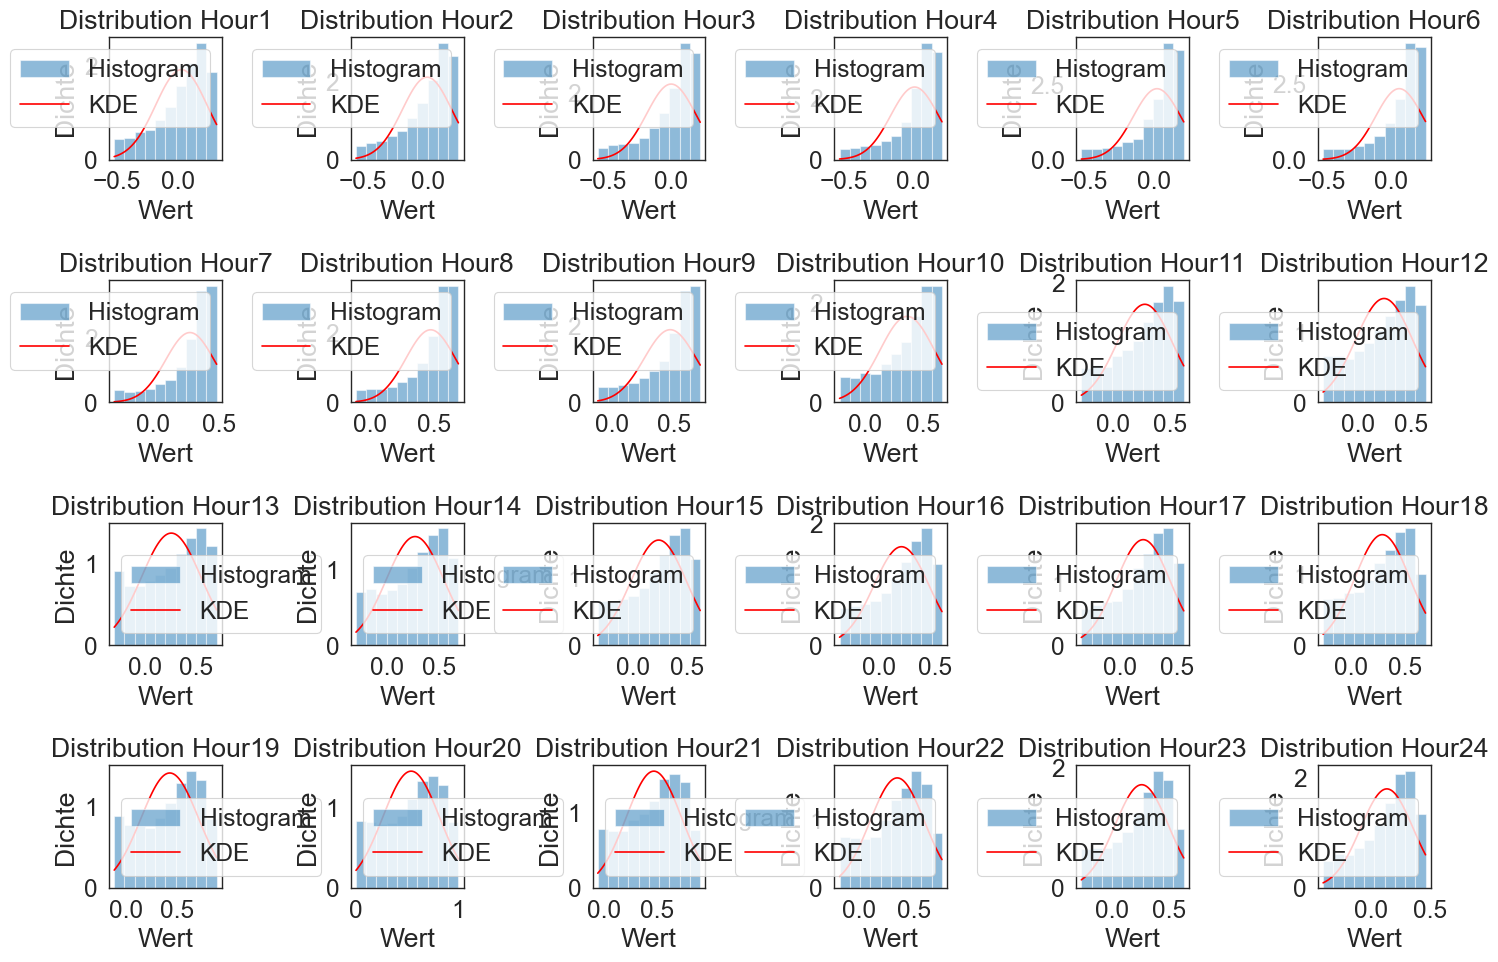

In [87]:
#Normalverteilungsapproximation
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from openpyxl import load_workbook

# Pfad zur Excel-Tabelle
path = r'C:\Users\Max Bernecker\IDiNA\Smart_meter_data_sort\check.xlsx'

# Namen der Spalten in der Excel-Tabelle, die du lesen möchtest
columns = ['Hour1','Hour2','Hour3','Hour4','Hour5','Hour6','Hour7','Hour8','Hour9',
           'Hour10','Hour11','Hour12','Hour13','Hour14','Hour15','Hour16','Hour17',
           'Hour18','Hour19','Hour20','Hour21','Hour22','Hour23','Hour24']

# DataFrame erstellen
df = pd.read_excel(path, usecols=columns)

# Schätzung der Verteilung, Mittelwert und Standardabweichung für jede Spalte
num_cols = len(df.columns)
num_rows = (num_cols + 5) // 6
fig, axs = plt.subplots(num_rows, 6, figsize=(15, 2.5 * num_rows))

for i, col in enumerate(df.columns):
    row_idx = i // 6
    col_idx = i % 6
    
    # Schätzung der Verteilung
    kde = np.histogram(df[col], density=True)
    
    # Mittelwert und Standardabweichung
    mean = np.mean(df[col])
    std = np.std(df[col])
    
    # Ausgabe der Ergebnisse
    print('Verteilungsschätzung für Spalte {}:'.format(col))
    print('Mittelwert:', mean)
    print('Standardabweichung:', std)
    
    # Histogramm
    axs[row_idx, col_idx].hist(df[col], bins=10, density=True, alpha=0.5, label='Histogram')
    
    # KDE-Plot
    x_axis = np.linspace(df[col].min(), df[col].max(), 100)
    kde_values = norm.pdf(x_axis, loc=mean, scale=std)
    axs[row_idx, col_idx].plot(x_axis, kde_values, 'r-', label='KDE')
    
    # Ausgabe der Formel für die geschätzte Verteilung
    print('Geschätzte Verteilung: Normalverteilung mit Mittelwert {} und Standardabweichung {}'.format(mean, std))
    
    # Plot anzeigen
    axs[row_idx, col_idx].legend()
    axs[row_idx, col_idx].set_title('Distribution {}'.format(col))
    axs[row_idx, col_idx].set_xlabel('Wert')
    axs[row_idx, col_idx].set_ylabel('Dichte')
    
# Überflüssige Plots entfernen
for i in range(num_cols, num_rows * 6):
    fig.delaxes(axs.flatten()[i])
    
plt.tight_layout()
plt.show()


FitDataError: Invalid values in `data`.  Maximum likelihood estimation with 'beta' requires that 0 < (x - loc)/scale  < 1 for each x in `data`.

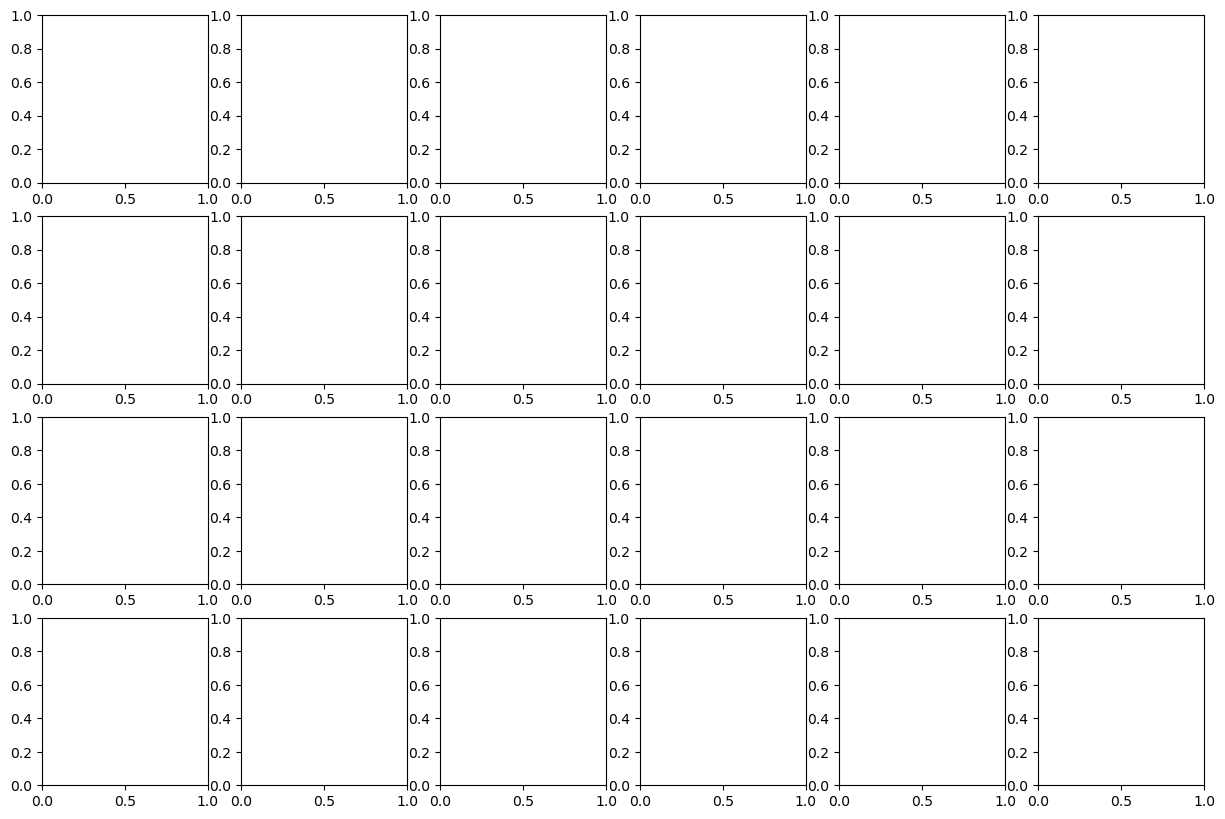

In [1]:
#Beta verteilung verbessert nur positive Werte
import pandas as pd
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

# Pfad zur Excel-Tabelle
path = r'C:\Users\Max Bernecker\IDiNA\Smart_meter_data_sort\check_positive.xlsx'

# Namen der Spalten in der Excel-Tabelle, die du lesen möchtest
columns = ['Hour1','Hour2','Hour3','Hour4','Hour5','Hour6','Hour7','Hour8','Hour9',
           'Hour10','Hour11','Hour12','Hour13','Hour14','Hour15','Hour16','Hour17',
           'Hour18','Hour19','Hour20','Hour21','Hour22','Hour23','Hour24']

# DataFrame erstellen
df = pd.read_excel(path, usecols=columns)

# Schätzung der Verteilung, Mittelwert und Standardabweichung für jede Spalte
num_cols = len(df.columns)
num_rows = (num_cols + 5) // 6
fig, axs = plt.subplots(num_rows, 6, figsize=(15, 2.5 * num_rows))

for i, col in enumerate(df.columns):
    row_idx = i // 6
    col_idx = i % 6
    
    # Schätzung der Verteilung
    params = beta.fit(df[col], floc=0, fscale=1)
    dist = beta(*params)
    
    # Mittelwert und Standardabweichung
    mean = np.mean(df[col])
    std = np.std(df[col])
    
    # Ausgabe der Ergebnisse
    print('Verteilungsschätzung für Spalte {}:'.format(col))
    print('Mittelwert:', mean)
    print('Standardabweichung:', std)
    
    # Histogramm und KDE-Plot
    axs[row_idx, col_idx].hist(df[col], bins=10, density=True, alpha=0.5, label='Histogram')
    x_axis = np.linspace(df[col].min(), df[col].max(), 100)
    axs[row_idx, col_idx].plot(x_axis, dist.pdf(x_axis), 'r-', label='KDE')
    
    # ECDF-Plot
    ecdf_x, ecdf_y = np.sort(df[col]), np.arange(1, len(df[col]) + 1) / len(df[col])
    axs[row_idx, col_idx].plot(ecdf_x, ecdf_y, 'g-', label='ECDF')
    
    # Ausgabe der Formel für die geschätzte Verteilung
    print('Geschätzte Verteilung: Beta-Verteilung mit Parametern a={}, b={}, loc=0, scale=1'.format(*params[0:2]))
    
    # Plot anzeigen
    axs[row_idx, col_idx].legend()
    axs[row_idx, col_idx].set_title('Verteilung von {}'.format(col))
    axs[row_idx, col_idx].set_xlabel('Wert')
    axs[row_idx, col_idx].set_ylabel('Dichte')
    
# Überflüssige Plots entfernen
for i in range(num_cols, num_rows * 6):
    fig.delaxes(axs.flatten()[i])
    
plt.tight_layout()
plt.show()


In [4]:
#'Beste Verteilung für jede Stunde'
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

# Pfad zur Excel-Tabelle
path = r'C:\Users\Max Bernecker\IDiNA\Smart_meter_data_sort\check.xlsx'

# Namen der Spalten in der Excel-Tabelle, die du lesen möchtest
columns = ['Hour1','Hour2','Hour3','Hour4','Hour5','Hour6','Hour7','Hour8','Hour9',
           'Hour10','Hour11','Hour12','Hour13','Hour14','Hour15','Hour16','Hour17',
           'Hour18','Hour19','Hour20','Hour21','Hour22','Hour23','Hour24']

# DataFrame erstellen
df = pd.read_excel(path, usecols=columns)
df.head()

,Hour1,Hour2,Hour3,Hour4,Hour5,Hour6,Hour7,Hour8,Hour9,Hour10,...,Hour15,Hour16,Hour17,Hour18,Hour19,Hour20,Hour21,Hour22,Hour23,Hour24
0,-0.118170,-0.026470,-0.005807,0.000731,-0.004207,-0.056378,-0.346043,-0.609529,-0.636967,-0.561768,...,-0.490886,-0.423792,-0.420672,-0.558888,-0.785352,-0.920447,-0.797694,-0.618578,-0.473274,-0.294009
1,-0.118150,-0.026422,-0.005807,0.000734,-0.004129,-0.056378,-0.346043,-0.609527,-0.636945,-0.561734,...,-0.490733,-0.423755,-0.420604,-0.558883,-0.785200,-0.920410,-0.797676,-0.618574,-0.473234,-0.293997
2,-0.118137,-0.026412,-0.005801,0.000736,-0.004065,-0.056378,-0.346043,-0.609523,-0.636942,-0.561721,...,-0.490581,-0.423755,-0.420552,-0.558796,-0.785113,-0.920302,-0.797610,-0.618565,-0.473219,-0.293991
3,-0.118105,-0.026387,-0.005799,0.000741,-0.004046,-0.056378,-0.346042,-0.609519,-0.636940,-0.561675,...,-0.490489,-0.423716,-0.420513,-0.558728,-0.785062,-0.920213,-0.797573,-0.618485,-0.473156,-0.293918
4,-0.118091,-0.026376,-0.005798,0.000746,-0.004034,-0.056378,-0.346029,-0.609518,-0.636919,-0.561648,...,-0.490489,-0.423535,-0.420508,-0.558723,-0.784983,-0.920174,-0.797563,-0.618407,-0.473121,-0.293879


In [6]:
from fitter import get_distributions
get_distributions()

['_fit',
 'alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'genhyperbolic',
 'geninvgauss',
 'genlogistic',
 'gennorm',
 'genpareto',
 'gibrat',
 'gilbrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'kstwo',
 'kstwobign',
 'laplace',
 'laplace_asymmetric',
 'levy',
 'levy_l',
 'levy_stable',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'loguniform',
 'lomax',
 'maxwell',
 'mielke',
 'moyal',
 'nakagami',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'norminvgauss',
 'pareto',
 'pearson3'

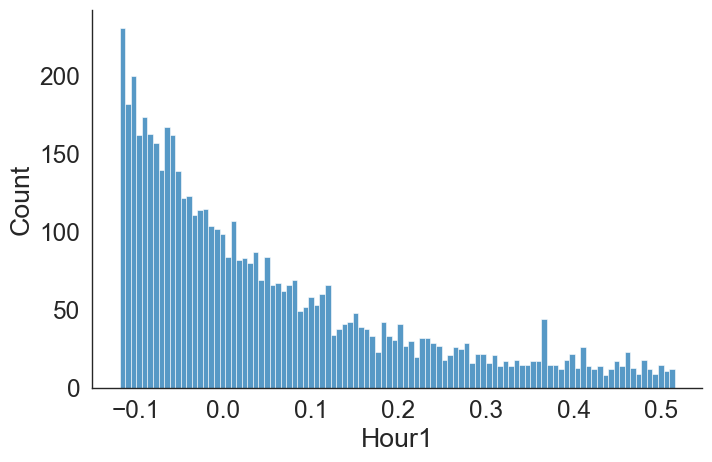

In [5]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="Hour1", kind="hist", bins = 100, aspect = 1.5)

C:\Miniconda\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Miniconda\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 4 distributions:  50%|█████████████████████████████▌                             | 2/4 [0

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,6.459472,22.646365,-3.718400e+04,0.019628,0.023864,0.003693
halflogistic,inf,inf,inf,inf,NaN,NaN
pareto,inf,inf,inf,inf,NaN,NaN
halfnorm,inf,inf,inf,inf,NaN,NaN


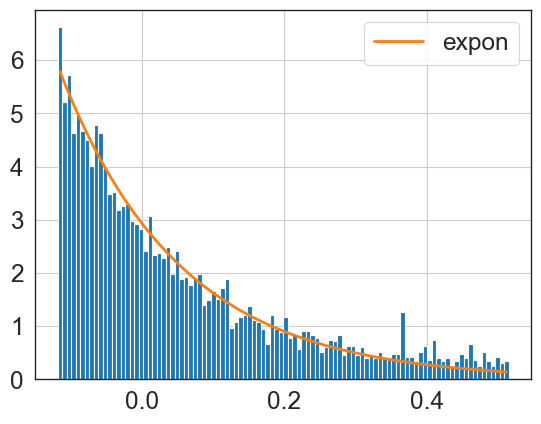

In [10]:
Hour=df['Hour1'].values
f = Fitter(Hour, distributions = ['pareto','expon','halflogistic','halfnorm']
           )
#, distributions = ['genhyperbolic','mielke','genlogistic']
f.fit()
f.summary()
#f.get_best(method = 'sumsquare_error')

In [ ]:
#'Beste Verteilung für jede Stunde mit Parametern'
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from fitter import Fitter, get_common_distributions, get_distributions

# Pfad zur Excel-Tabelle
path = r'C:\Users\Max Bernecker\IDiNA\Smart_meter_data_sort\check_shift_positive.xlsx'

# Namen der Spalten in der Excel-Tabelle, die du lesen möchtest
columns = ['Hour1','Hour2','Hour3','Hour4','Hour5','Hour6','Hour7','Hour8','Hour9',
           'Hour10','Hour11','Hour12','Hour13','Hour14','Hour15','Hour16','Hour17',
           'Hour18','Hour19','Hour20','Hour21','Hour22','Hour23','Hour24']

# DataFrame erstellen
df = pd.read_excel(path, usecols=columns)

for col in columns:
    # Histogramm plotten
    #sns.set_style('white')
    #sns.set_context("paper", font_scale = 2)
    #sns.displot(data=df, x=col, kind="hist", bins = 100, aspect = 1.5)

    # Verteilung anpassen und Zusammenfassung ausgeben
    data = df[col].values
    f = Fitter(data)
    f.fit()
    f.summary()
    print(f.get_best(method = 'sumsquare_error'))
    #print(f"Beste Verteilung für Spalte {col}: {f.get_best()}")
    #print(f"Zusammenfassung für Spalte {col}: {f.summary()}\n")
    # KS-Test durchführen
    #ks_stat, p_value = stats.kstest(data, best_dist.name, args=best_params)
    #print(f"KS-Test-Statistik für Spalte {col}: {ks_stat:.4f}")
    #print(f"P-Wert für KS-Test für Spalte {col}: {p_value:.4f}")

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fitter import Fitter

# Pfad zur Excel-Tabelle
path = r'C:\Users\Max Bernecker\IDiNA\Smart_meter_data_sort\check_shift_positive.xlsx'

# Namen der Spalten in der Excel-Tabelle, die du lesen möchtest
columns = ['Hour1','Hour2','Hour3','Hour4','Hour5','Hour6','Hour7','Hour8','Hour9',
           'Hour10','Hour11','Hour12','Hour13','Hour14','Hour15','Hour16','Hour17',
           'Hour18','Hour19','Hour20','Hour21','Hour22','Hour23','Hour24']

# DataFrame erstellen
df = pd.read_excel(path, usecols=columns)

# Bestimmung der besten Verteilung für jede Spalte
best_dists = {}
for col in columns:
    data = df[col].values
    f = Fitter(data, distributions=['gamma', 'lognorm', 'beta', 'burr', 'norm'])
    f.fit()
    if f.get_best() is None:
        print(f'Warning: No best distribution found for column {col}')
    else:
        best_dists[col] = f.get_best()

# Plotten der Verteilungen
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(15, 2.5 * num_rows))
for i, col in enumerate(columns):
    row = i // 6
    col = i % 6
    sns.histplot(data=df, x=df.columns[col], ax=axs[row, col],stat='density')
    x = np.linspace(df[col].min(), df[col].max(), 1000)
    y = df.pdf(x)
    axs[row, col].plot(x, y, color='r', label=dist.name)
    axs[row, col].legend()

plt.show()

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.10it/s]


NameError: name 'num_rows' is not defined